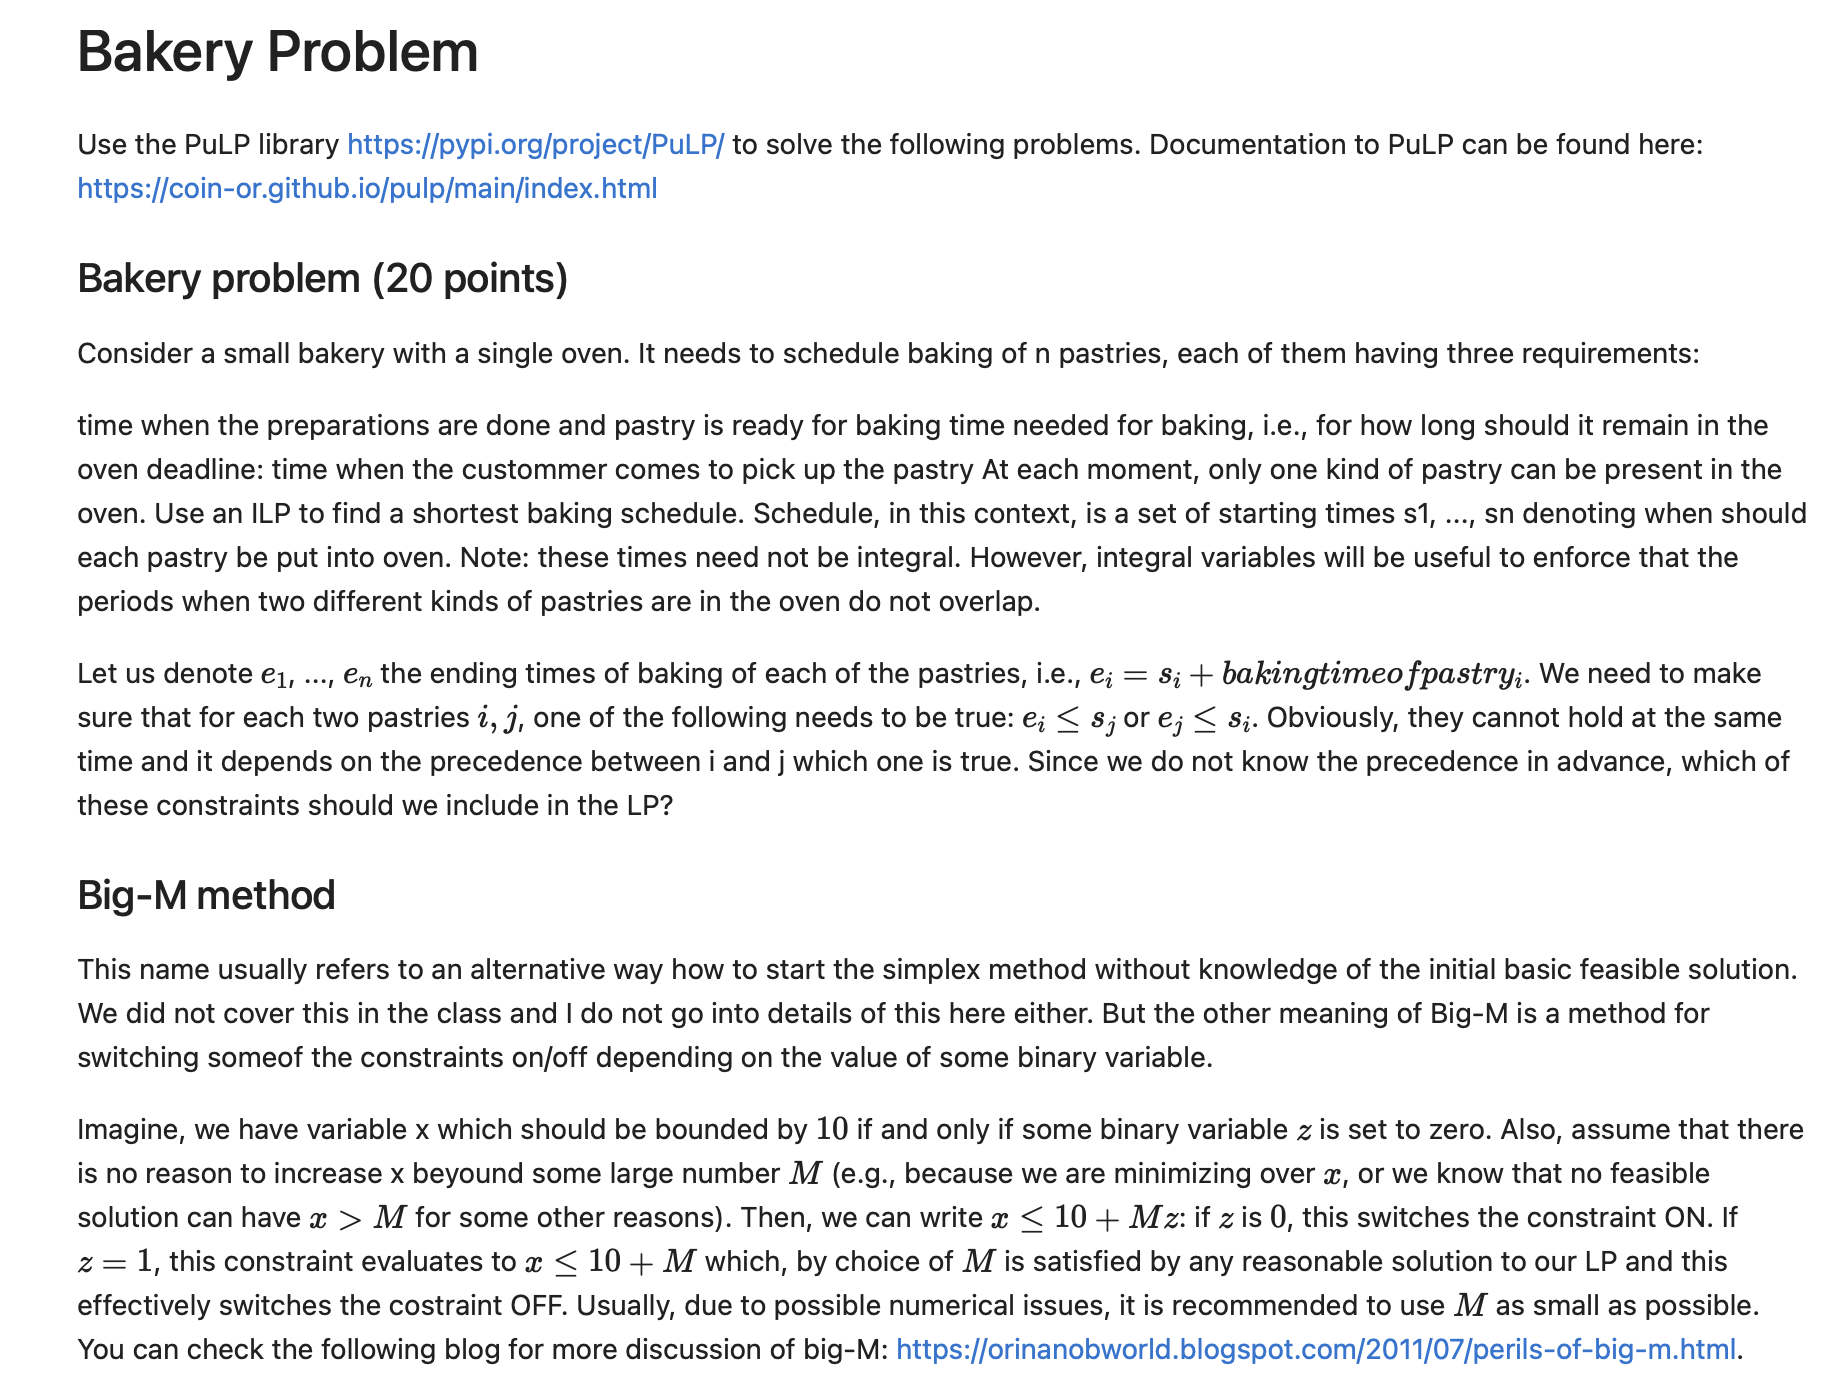

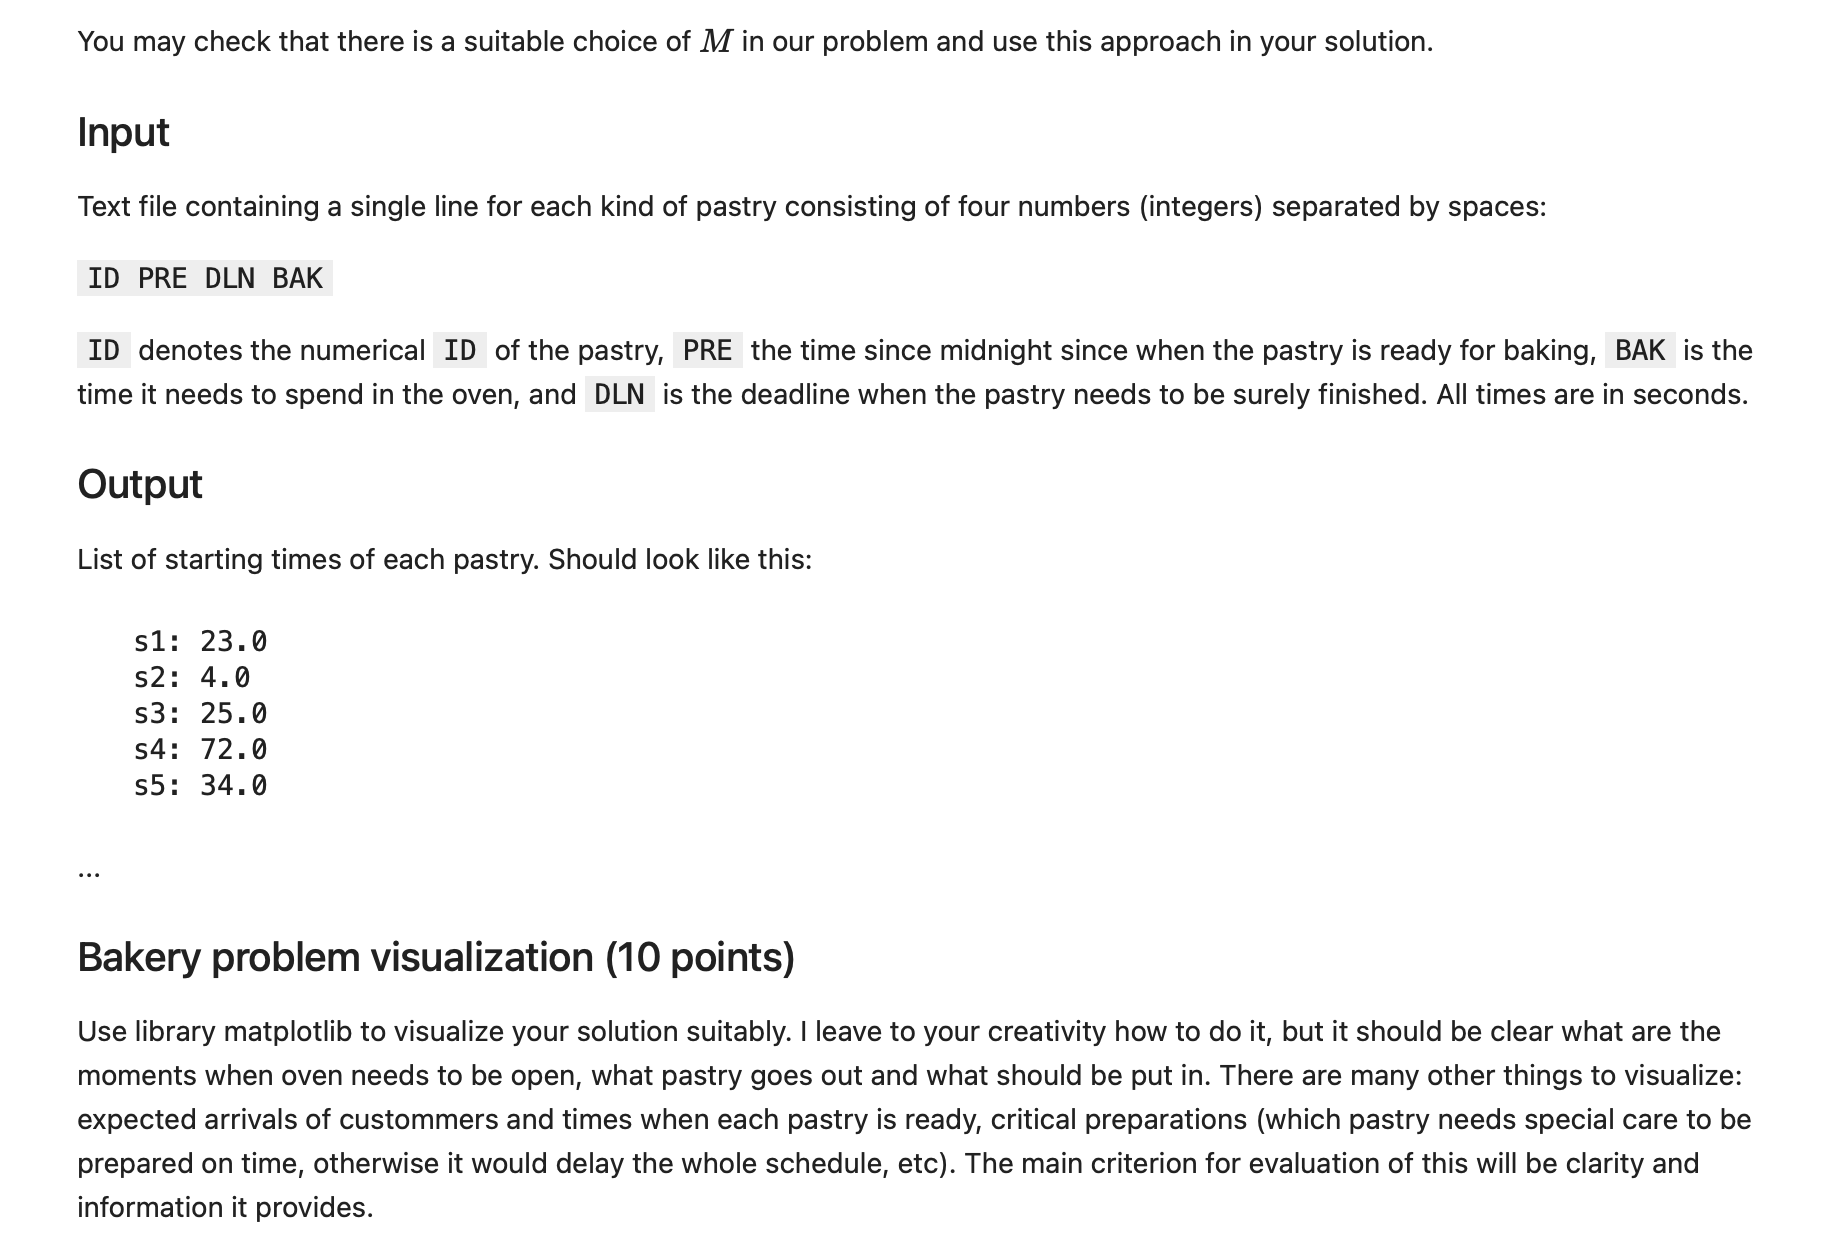

In [1]:
from IPython.display import Image, display

def display_images(image_files):
    for image_file in image_files:
        display(Image(filename=image_file))

image_files = ["./Bake-1.png", "./Bake-2.png"]  
display_images(image_files)

/Users/alisiasarabaielli/opt/anaconda3/envs/ML/lib/python3.8/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


s_0: 7800.0
s_1: 21600.0
s_2: 0.0
s_3: 4800.0
s_4: 1800.0
s_5: 8400.0
s_6: 13800.0
s_7: 12600.0
s_8: 18600.0
s_9: 600.0
s_10: 11400.0
s_11: 19800.0
s_12: 16800.0
s_13: 15000.0
s_14: 9600.0
s_15: 5400.0
s_16: 2400.0
Total time: 22200.0


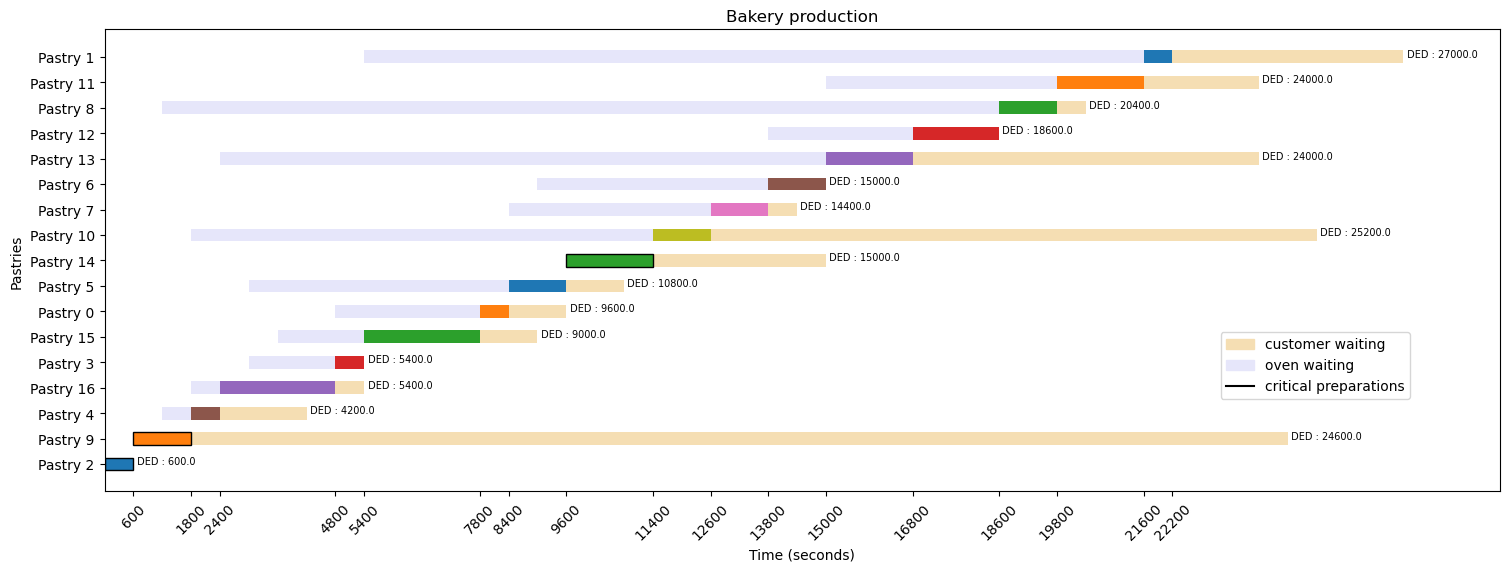

In [2]:
import matplotlib.pyplot as plt
import datetime
import pulp
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
# solver = COIN_CMD(path="/usr/bin/cbc",threads=8)
# def bakery():


    #visualization_filename = './visualization.jpg'


    #return retval

with open("bakery.txt", "r") as f:
    data = [list(map(int, line.strip().split())) for line in f]

model = pulp.LpProblem("bakery problem", pulp.LpMinimize)

s = pulp.LpVariable.dicts("s", [i for i in range(0, 17)], 0, cat="Integer")
y_obj = pulp.LpVariable("y_obj", lowBound=0, cat="Continuous")
v_aux = pulp.LpVariable.dicts("v_aux", [(i, j) for i in range(17) for j in range(17)], cat="Binary")

model += y_obj

M = 27001

for i in range(17):
    model += s[i] >= data[i][1]
    model += s[i] + data[i][3] <= data[i][2]
    model += y_obj >= s[i] + data[i][3]
    for j in range(17):
        if j > i:
            model += s[i] <= s[j] - data[i][3] + M * v_aux[i, j]
            model += s[j] <= s[i] - data[j][3] + M * (1 - v_aux[i, j])

model.solve(pulp.PULP_CBC_CMD(msg=False))


for i in range(17):
  print(f's_{i}:', s[i].value())
 
print(f"Total time: {(model.objective).value()}")

# VISUALIZATION

    
save = {}
for i in range(17):
    var = s[i].varValue
    start = datetime.timedelta(seconds=var)
    end = datetime.timedelta(seconds=var + data[i][3])
    ded = datetime.timedelta(seconds=data[i][2])
    prep = datetime.timedelta(seconds=data[i][1])
    save[i] = [start, end, ded, prep]

sorted_pastries = sorted(save.items(), key=lambda x: x[1][1].total_seconds())


sorted_products = [f'Pastry {i}' for i, _ in sorted_pastries]
sorted_strt = [save[i][0].total_seconds() for i, _ in sorted_pastries]
sorted_dur = [save[i][1].total_seconds() - save[i][0].total_seconds() for i, _ in sorted_pastries]
sorted_end = [save[i][1].total_seconds() for i, _ in sorted_pastries]
sorted_ded = [save[i][2].total_seconds() for i, _ in sorted_pastries]
sorted_prep = [save[i][3].total_seconds() for i, _ in sorted_pastries]

sorted_colors = ['C7', 'C6', 'C5', 'C4', 'C3', 'C2', 'C1', 'C0', 'C9', 'C8', 'C6', 'C5', 'C4', 'C3', 'C2', 'C1', 'C0']

fig, ax = plt.subplots(figsize=(18, 6))
ax.barh(sorted_products, sorted_dur, left=sorted_strt, height=0.5, color=sorted_colors)


for i in range(17):
    ax.barh(sorted_products[i], sorted_ded[i] - sorted_end[i], left=sorted_end[i], height=0.5, color='wheat')
    ax.barh(sorted_products[i], sorted_strt[i]-sorted_prep[i],left=sorted_prep[i], height=0.5, color='lavender' )
    ax.text(sorted_ded[i] + 5, sorted_products[i], f' DED : {sorted_ded[i]} ', color = 'black', fontsize = 7)
   
    if sorted_strt[i] == sorted_prep[i]:
        ax.barh(sorted_products[i], sorted_dur[i], left=sorted_strt[i], height=0.5, edgecolor = 'black' )
        
ax.set_xlim(0, 29000)

ax.set_xlabel('Time (seconds)', color = 'black')
ax.set_ylabel('Pastries', color = 'black')
ax.set_title('Bakery production', color = 'black')


ax.set_xticks(sorted_end)

ax.tick_params(axis='x', labelrotation=45)

weath_patch = mpatches.Patch(color='wheat', label='customer waiting')
lav_patch = mpatches.Patch(color= 'lavender', label='oven waiting')
black_line = mlines.Line2D([],[],color='black', label='critical preparations')

plt.legend(handles= [weath_patch, lav_patch, black_line], loc = (0.8,0.2))

plt.show()


